### Plotting USGS Earthquake Data

For this we will use data from http://earthquake.usgs.gov/ which maintains csv files corresponding to data of earthquake occurrences sorted according to earthquakes magnitude, ranging from significant only down to all earthquakes, major or minor. The csv files are available here 

In [7]:
feed="http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

In [3]:
import numpy as np
import pandas as pd
import urllib2
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Garrett/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Check if you have the updated version of Matplotlib i.e 1.5.0. If not you can udate it using linux command sudo pip install --upgrade matplotlib for unix boxes and corresponding brew command for mac

In [4]:
print mpl.__version__

1.5.3


### Acquiring Data ###

We will be working with the following csv files

1. Significant earthquakes in the last 30 days : feed + "significant_month.csv"
2. Magnitude > 4.5 : feed + "4.5_month.csv"
3. Magnitude > 2.5 : feed + "2.5_month.csv"
4. Magnitude > 1.0 : feed + "1.0_month.csv"

First we write a function which takes an integer input from 1 to 4 and outputs a pandas dataframe corresponding to the csv file above. Note that the function should necessarily download the data from the website via internet.

In [5]:
filenames=["significant_month.csv",
           "4.5_month.csv",
           "2.5_month.csv",
           "1.0_month.csv"]
def download_data(i):
    url=feed+filenames[i-1];
    print 'downloading',url
    return pd.read_csv(url);

In [8]:
last_30 = download_data(1)
data_45 = download_data(2)
data_25 = download_data(3)
data_10 = download_data(4)
data_45

downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv
downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_month.csv


time  latitude  longitude   depth  mag magType  nst  \
0    2016-11-18T23:22:48.790Z   41.0259    22.7007   10.00  4.7     mwr  NaN   
1    2016-11-18T20:54:46.320Z  -28.2558  -176.8730   10.00  5.5      mb  NaN   
2    2016-11-18T17:11:32.820Z  -21.4558   -66.7336  220.94  4.7      mb  NaN   
3    2016-11-18T15:55:34.150Z  -42.5599   173.1457   10.00  4.5      mb  NaN   
4    2016-11-18T14:22:56.900Z  -42.6222   173.2887    9.36  5.1      mb  NaN   
5    2016-11-18T12:08:19.610Z   34.6700     6.2505    9.70  4.9      mb  NaN   
6    2016-11-18T11:48:41.690Z   -7.0747   154.7576    9.18  4.9      mb  NaN   
7    2016-11-18T07:42:22.480Z   34.7577     6.2435   10.00  5.3      mb  NaN   
8    2016-11-18T06:54:38.010Z   36.6166    71.3680   90.79  4.5      mb  NaN   
9    2016-11-18T02:19:31.350Z   -8.8486   110.5332   48.80  4.6      mb  NaN   
10   2016-11-18T00:23:49.010Z   14.1621   -91.1878   72.17  4.5     mwr  NaN   
11   2016-11-17T22:08:55.490Z  -27.9297   -66.6199  182.84  4.7      mb  NaN   
12   2016-11-17T21:45:56.740Z   32.6762    96.1000   10.00  5.0      mb  NaN   
13   2016-11-17T21:27:01.110Z  -42.3324   173.9918   10.00  4.8      mb  NaN   
14   2016-11-17T16:56:43.690Z   -6.3226   130.5321  107.01  5.5     mww  NaN   
15   2016-11-17T14:29:25.930Z  -55.8930   -27.5455   67.93  5.2      mb  NaN   
16   2016-11-17T10:53:24.030Z   26.1869   125.5368  126.95  4.8      mb  NaN   
17   2016-11-17T09:53:58.940Z   14.9436   -61.2037  161.87  4.5      mb  NaN   
18   2016-11-17T08:22:45.060Z    7.6937   -82.3803   10.00  4.6      mb  NaN   
19   2016-11-17T06:15:32.360Z   -3.2493   146.5663   15.61  4.7      mb  NaN   
20   2016-11-17T03:53:51.180Z   21.2298   120.1043   24.69  4.6      mb  NaN   
21   2016-11-17T00:58:10.910Z    8.9724   126.4573   51.83  4.9      mb  NaN   
22   2016-11-16T23:39:41.220Z  -41.7930   174.3248   19.39  4.7      mb  NaN   
23   2016-11-16T23:13:36.700Z  -42.2926   173.8858   15.46  4.9      mb  NaN   
24   2016-11-16T21:05:00.830Z  -41.7569   174.2125   22.72  4.6     mwr  NaN   
25   2016-11-16T20:44:28.270Z  -24.0695   -66.8590  197.34  4.5      mb  NaN   
26   2016-11-16T20:26:15.350Z  -22.1305  -177.6209  305.08  5.5      mb  NaN   
27   2016-11-16T16:01:57.260Z   35.5829   140.1729   61.26  4.6      mb  NaN   
28   2016-11-16T15:10:11.230Z   -8.9671   113.1814   85.86  5.7     mww  NaN   
29   2016-11-16T15:03:49.350Z  -42.5032   173.4571   13.05  4.6      mb  NaN   
..                        ...       ...        ...     ...  ...     ...  ...   
364  2016-10-22T21:10:13.100Z   -5.7903   151.2152   35.00  4.6      mb  NaN   
365  2016-10-22T18:47:19.450Z   85.5971    83.6553   10.00  4.7      mb  NaN   
366  2016-10-22T17:49:34.510Z   -6.3200   129.8137   24.39  5.0      mb  NaN   
367  2016-10-22T16:42:19.510Z   52.1489  -177.1693  143.02  4.8      mb  NaN   
368  2016-10-22T02:00:37.260Z   12.4044   144.1071   10.00  4.8      mb  NaN   
369  2016-10-21T23:31:28.840Z   37.2854    71.9225  201.93  4.5      mb  NaN   
370  2016-10-21T19:51:16.760Z   14.4147   -91.3760   96.63  4.6      mb  NaN   
371  2016-10-21T19:26:58.990Z   13.9537   -93.7563   34.81  4.5      mb  NaN   
372  2016-10-21T18:38:34.090Z  -17.3966    66.2538   13.04  4.5      mb  NaN   
373  2016-10-21T18:33:46.170Z   32.7757   131.8941   48.60  4.9      mb  NaN   
374  2016-10-21T18:20:48.660Z  -37.1778   179.0430   13.39  4.5     mwr  NaN   
375  2016-10-21T18:08:36.990Z   28.8307   138.7618  495.21  4.7      mb  NaN   
376  2016-10-21T16:41:11.680Z   -6.3505   145.7136  127.11  4.9      mb  NaN   
377  2016-10-21T16:32:33.400Z   -3.4144   145.4435   10.00  5.0      mb  NaN   
378  2016-10-21T16:10:53.500Z    1.8419   127.3068   97.34  5.0      mb  NaN   
379  2016-10-21T08:44:50.600Z   43.6287   148.3782   38.85  4.8      mb  NaN   
380  2016-10-21T06:25:42.410Z  -17.6443  -177.9422  535.72  4.5      mb  NaN   
381  2016-10-21T05:53:18.150Z   35.3651   133.8024   10.00  4.6      mb  NaN   
382  2016-10-21T05:07:23.

### Analyzing the data ###

In order to understand the data we will plot different attributes of the data using tools provided by matplotlib.
In order to do that, we will first create a class object for the given dataframe.


-179.9479 179.81


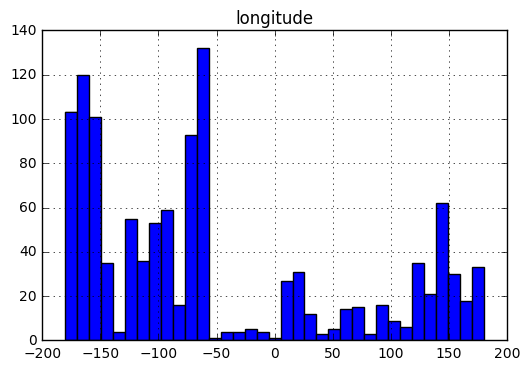

In [17]:
def DF_hist(df,col='longitude'):
    Min=df[col].min();
    Max=df[col].max();
    print Min,Max
    df.hist(column=col,bins=int((Max-Min)/10.0))
DF_hist(data_25)

In [18]:
class dataPlot:
    """dataPlot takes a pandas dataframe as input and outputs different plots correspondng to the input dataframe"""
    
    def __init__(self,df):
        """Initialize variables"""
        self.df = df
        #raise "TODO"
        
    def histogram(self,col):
        if col == 'longitude' or col == 'latitude':
            Min=self.df[col].min();
            Max=self.df[col].max();
            self.df.hist(column=col,bins=int((Max-Min)/10.0))
        else:
            print('not latitude or longitude')
            Min=self.df[col].min();
            #print(Min)
            Max=self.df[col].max();
            #print(Max)
            self.df.hist(column=col,bins=20)
        #raise "TODO"
        
    def scatter(self,col1,col2):
        #raise "TODO"
        if [col1,col2] == ['latitude','longitude'] or ['longitude','latitude']:
            #dotsize = self.df
            self.df.plot(x=col1,y=col2,kind='scatter',s=(self.df['mag']**self.df['mag'])/100)#use s= to change dot size
            

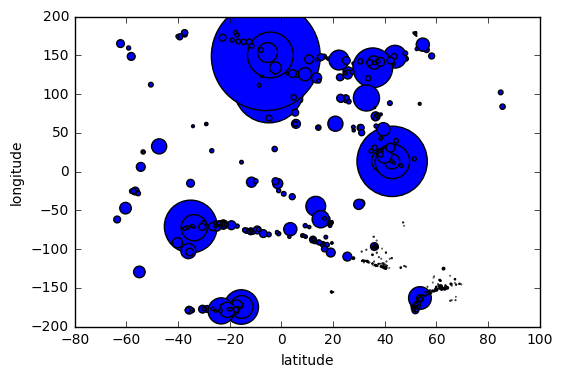

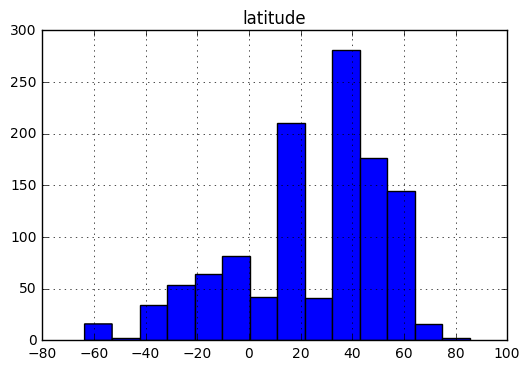

In [19]:
a=dataPlot(data_25)

a.scatter('latitude','longitude')
a.histogram('latitude')

not latitude or longitude


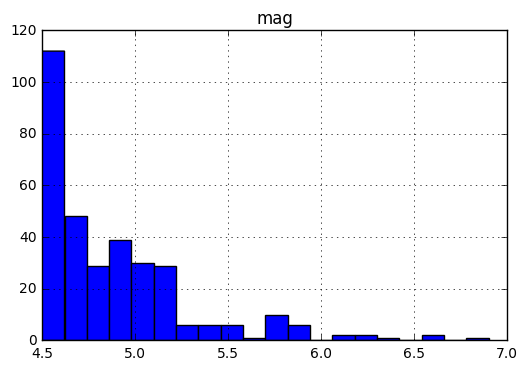

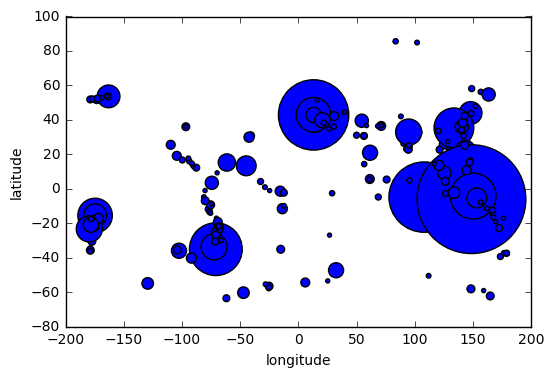

In [20]:
#The folloring command should now generate a histogram and a scatter-plot
D=dataPlot(data_45)
D.histogram('mag')
D.scatter('longitude','latitude')

### Plotting data on the map ###

Now we will use basemap to plot the earthquake data, and further enhance it with a rain animation to indicate the severity of the incident. We will start initially with the dataset corresponding to earthquakes magnitude > 4.5

In [12]:
data_45 = download_data(2)

downloading http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv


First we will import necessary libraries

In [13]:
from mpl_toolkits.basemap import Basemap

Next we will generate a figure canvas with a basemap projection. We will use the 'mill' projection of Basemap for this assignment. 

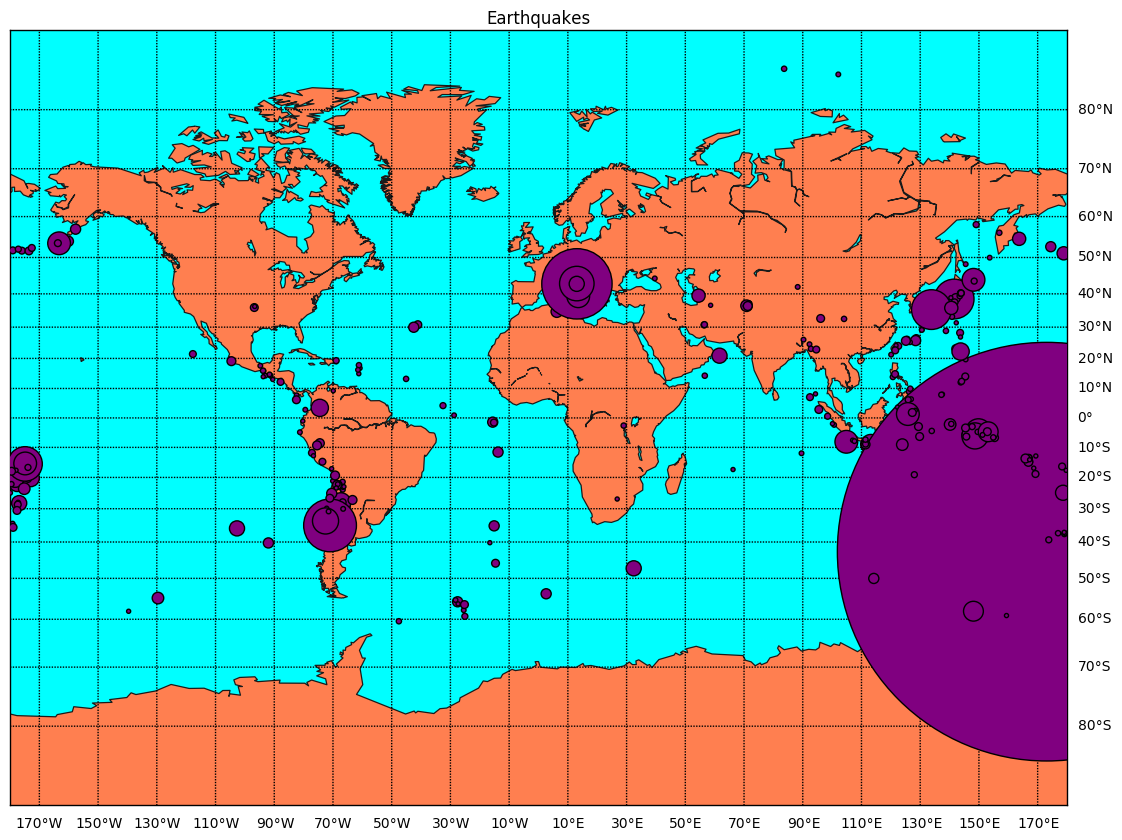

In [14]:
#General plot  initializations
fig = figure(figsize=(14,10))
ax = subplot(1,1,1)
earth = Basemap(projection='mill')
# We then draw coastlines and continents
earth.drawcoastlines(color='0.10', linewidth=0.9);
earth.fillcontinents(color='coral',lake_color='aqua');
earth.drawmapboundary(fill_color='aqua')
parallels = np.arange(-80.,81,10.)
earth.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
earth.drawmeridians(meridians,labels=[True,False,False,True])
lons = data_45['longitude'].values
lats = data_45['latitude'].values
x, y = earth(lons,lats)
scat = earth.scatter(x,y,c='purple',s=data_45['mag']**data_45['mag']/100)
scat.set_zorder(20)
plt.title('Earthquakes')



Wrapping it all in a function as well as making the circles semi-transparent to better show intensity:

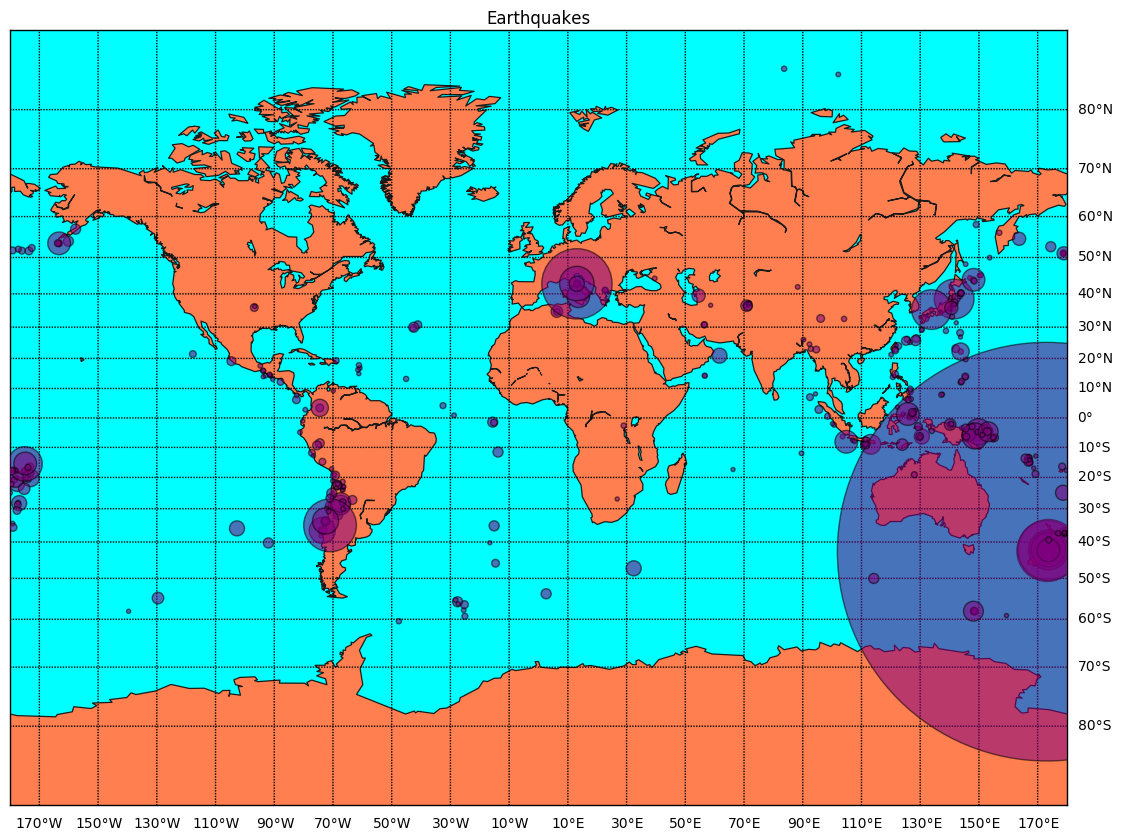

In [15]:
def earthquakes(df,lati_col,longi_col,mags):
    fig = figure(figsize=(14,10))
    ax = subplot(1,1,1)
    earth = Basemap(projection='mill')
    # We then draw coastlines and continents
    earth.drawcoastlines(color='0.10', linewidth=0.9);
    earth.fillcontinents(color='coral',lake_color='aqua');
    earth.drawmapboundary(fill_color='aqua')
    parallels = np.arange(-80.,81,10.)
    # labels = [left,right,top,bottom]
    earth.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    earth.drawmeridians(meridians,labels=[True,False,False,True])
    lons = data_45[longi_col].values
    lats = data_45[lati_col].values
    x, y = earth(lons,lats)
    scat = earth.scatter(x,y,c='purple',s=data_45[mags]**data_45[mags]/100,alpha = 0.55)
    scat.set_zorder(20)
    plt.title('Earthquakes')
quake = earthquakes(data_45,'latitude','longitude','mag')

## We can also split the time frame of the data into multiple parts to show intervals of earthquake occurances:

creating scatter
creating scatter
creating scatter
creating scatter
creating scatter


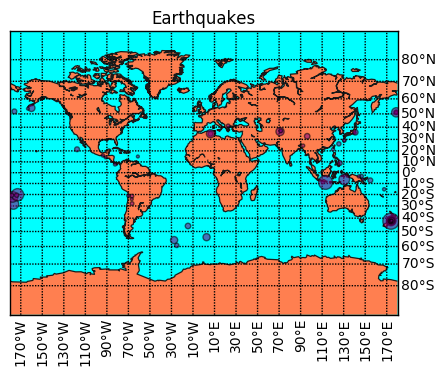

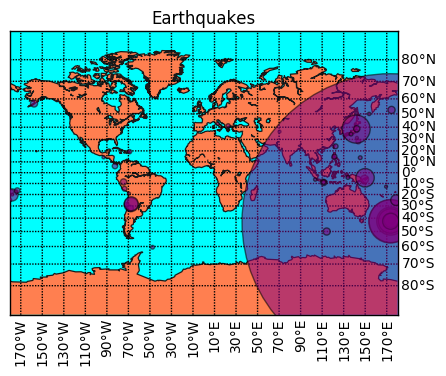

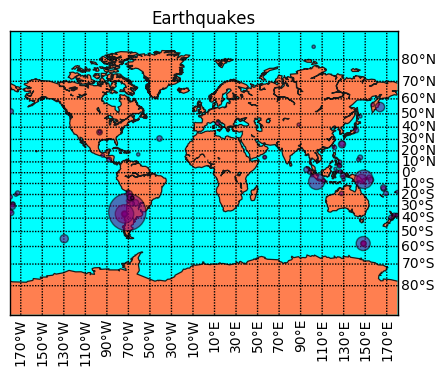

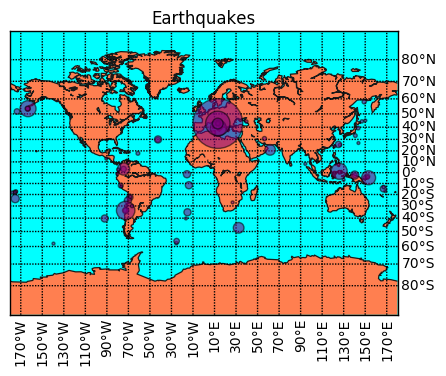

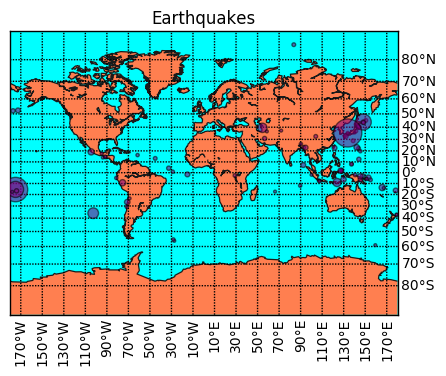

In [45]:
#from pandas.tools.plotting import scatter_matrix
import datetime
import math

class quakeplot:
    def __init__(self,data):
        self.df = data
        #self.timerange = self.df[time_col]
    
    
    def quakescatter(self,data,lati_col,longi_col,mags):
        print('creating scatter')
        ##include code for time periods
        fig = figure(figsize=(5,4))
        ax = subplot(1,1,1)
        earth = Basemap(projection='mill')
        # We then draw coastlines and continents
        earth.drawcoastlines(color='0.10', linewidth=0.9);
        earth.fillcontinents(color='coral',lake_color='aqua');
        earth.drawmapboundary(fill_color='aqua')
        parallels = np.arange(-80.,81,10.)
        earth.drawparallels(parallels,labels=[False,True,True,False])
        meridians = np.arange(10.,351.,20.)
        earth.drawmeridians(meridians,labels=[True,False,False,True],rotation=90)
        lons = data[longi_col].values
        lats = data[lati_col].values
        x, y = earth(lons,lats)
        scat = earth.scatter(x,y,c='purple',s=data[mags]**data[mags]/200,alpha = 0.55)
        scat.set_zorder(20)
        plt.title('Earthquakes')
        return scat

    
    def earthquakes (self,numplots = ''):
        self.numplots = int(numplots)
        self.indexlen = len(self.df.index) ## number of items in index
        self.period = int(floor(self.indexlen/self.numplots))
        plotlist = []
        for j in range(0,self.indexlen,self.period):
            self.newdf = self.df[j:j+self.period]
            if len(self.newdf.index.values) < self.period:
                break## breaks if the newest dataframe is smaller than the period so there is no extra plot
            a = self.quakescatter(self.newdf,'latitude','longitude','mag')
            plotlist.append(a)
        return(plotlist)
    
    
    
    
    
quake = quakeplot(data_45)
quake.earthquakes(numplots = 5)
#quake._scatter('latitude','longitude','mag')

## Overlaying the time frames into one plot and separating by color code:

/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


indigo    131
Name: color, dtype: int64
creating scatter
gold    131
Name: color, dtype: int64
creating scatter
hotpink    131
Name: color, dtype: int64
creating scatter


()

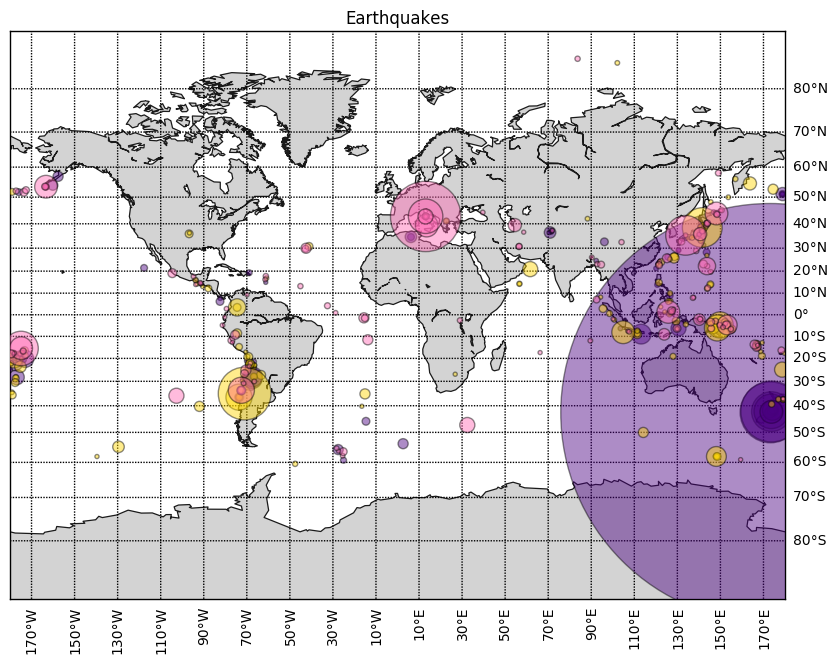

In [44]:
#from pandas.tools.plotting import scatter_matrix

##############################################################################
##
##  The problem states that the plots should be broken up by time period
##  but is not clear on what the time period is. Therefore I have written two sets of code.
##  The first code takes user can input a number of plots they want and will out put that
##  many plots split up by time period. The second code puts out one graph with different colored
##  data points based on time period. Above is first code. Below is second
##
##############################################################################
from matplotlib import colors
import math

class quakeplot:
    def __init__(self,data):
        self.df = data
        #self.timerange = self.df[time_col]
    
    
    def quakescatter(self,data,lati_col,longi_col,mags):
        print('creating scatter')
#         ##include code for time periods
#         fig = figure(figsize=(4,3))
#         ax = subplot(1,1,1)
#         earth = Basemap(projection='mill')
#         # We then draw coastlines and continents
#         earth.drawcoastlines(color='0.10', linewidth=0.9);
#         earth.fillcontinents(color='coral',lake_color='aqua');
#         earth.drawmapboundary(fill_color='aqua')
#         parallels = np.arange(-80.,81,10.)
#         earth.drawparallels(parallels,labels=[False,True,True,False])
#         meridians = np.arange(10.,351.,20.)
#         earth.drawmeridians(meridians,labels=[True,False,False,True],rotation=90)
        lons = data[longi_col].values
        lats = data[lati_col].values
        x, y = earth(lons,lats)
        scat = earth.scatter(x,y,c=data['color'],s=data[mags]**data[mags]/100,alpha = 0.45)
        scat.set_zorder(20)
        plt.title('Earthquakes')
        return scat

    
    def earthquakes (self,numplots = ''):
        self.numplots = int(numplots)
        self.indexlen = len(self.df.index) ## number of items in index
        self.period = int(floor(self.indexlen/self.numplots))
        #include code for time periods
        fig = figure(figsize=(10,8))
        ax = subplot(1,1,1)
        earth = Basemap(projection='mill')
        # We then draw coastlines and continents
        earth.drawcoastlines(color='0.10', linewidth=0.9);
        earth.fillcontinents(color='lightgrey')#,lake_color='');
        #earth.drawmapboundary(fill_color='aqua')
        parallels = np.arange(-80.,81,10.)
        earth.drawparallels(parallels,labels=[False,True,True,False])
        meridians = np.arange(10.,351.,20.)
        earth.drawmeridians(meridians,labels=[True,False,False,True],rotation=90)
        newlist = colors.cnames ## newlist is technically a dictionary of colors:hex codes
        colorlist = newlist.keys()
        clpos = 0
#         plotlist = []
        for j in range(0,self.indexlen,self.period):
            #print(colorlist[clpos])
            self.newdf = self.df[j:j+self.period]
            if len(self.newdf.index.values) < self.period:
                break ## breaks if the newest dataframe is smaller than the period so there is no extra plot
            self.newdf['color']=colorlist[clpos]
            print(self.newdf['color'].value_counts())
            #print(self.newdf['color'])
            self.quakescatter(self.newdf,'latitude','longitude','mag')
            clpos+=1
#             plotlist.append(a)
        return()
    
    
    
    
    
quake = quakeplot(data_45)
quake.earthquakes(numplots = 3)
#quake._scatter('latitude','longitude','mag')